#### 코드 참조 
[1] https://github.com/rickiepark/machine-learning-with-python-cookbook
[2] https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html 
[3] https://github.com/mikexcohen/LinAlgBook/blob/main/python
[4] https://docs.sympy.org/latest/tutorial/matrices.html
[5] Dr. Jaewook Lee's Lecture Notes

# 4장 최소 좌승법과 QR 분해

## 그람슈미트 직교화(GS orthogonalization)

In [1]:
## import libraries for the entire chapter
import numpy as np
# create the matrix 
m = 4
n = 4
A = np.random.randn(m,n)

# initialize
Q = np.zeros((m,n))


# the GS algo
for i in range(n):
    
    # initialize
    Q[:,i] = A[:,i]
    
    # orthogonalize
    a = A[:,i] # convenience
    for j in range(i): # only to earlier cols
        q = Q[:,j] # convenience
        Q[:,i]=Q[:,i]-np.dot(a,q)/np.dot(q,q)*q
    
    # normalize
    Q[:,i] = Q[:,i] / np.linalg.norm(Q[:,i])


In [2]:
# "real" QR decomposition for comparison
Q2,R = np.linalg.qr(A)


# note the possible sign differences.
# seemingly non-zero columns will be 0 when adding
Q-Q2

array([[ 5.55111512e-17, -1.35308431e-16,  4.21756517e-01,
         2.22044605e-16],
       [-1.11022302e-16,  1.66533454e-16, -5.28551642e-01,
         1.11022302e-16],
       [ 0.00000000e+00,  1.11022302e-16,  7.95573756e-01,
        -7.56339436e-16],
       [ 0.00000000e+00,  5.55111512e-17, -1.70581857e+00,
        -2.77555756e-16]])

In [3]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [4]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
i

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [5]:
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

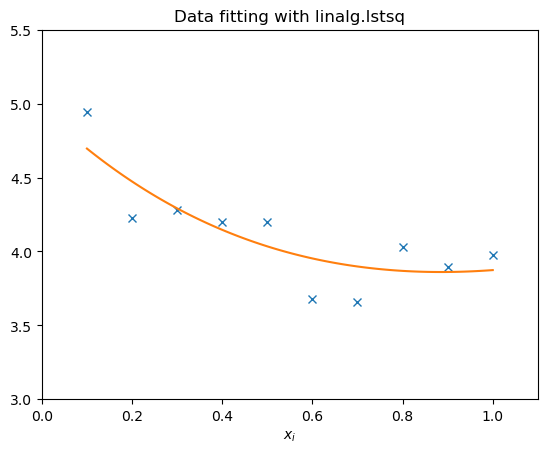

In [6]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

In [7]:
q, r = linalg.qr(A)
np.allclose(A, np.dot(q, r))

True

In [8]:
A.shape, q.shape, r.shape

((10, 2), (10, 10), (10, 2))

In [9]:
# either both Q and R (‘full’, default), only R (‘r’) or 
# both Q and R but computed in economy-size (‘economic’, see Notes)
r2 = linalg.qr(A, mode='r')
np.allclose(r, r2)

True

In [10]:
q3, r3 = linalg.qr(A, mode='economic')
q3.shape, r3.shape

((10, 2), (2, 2))

In [11]:
q3.T@ zi

array([-12.72974127,   2.76039062])

In [12]:
x=np.linalg.solve(r3, q3.T@ zi)
x, c

(array([4.96368556, 2.04805376]), array([4.96368556, 2.04805376]))